In this project, you'll build your first Online Shopper Intention Model using Random Forest Classifier and use it to predict whether a customer will purchase something or not. We've provided some of the code, but left the implementation of the model building up to you (for the most part). After you've submitted this project, feel free to explore the data and the model more.




<img src="https://images.pexels.com/photos/920382/pexels-photo-920382.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500.jpg" width="1000px">



## Importing Some Basic Libraries

In the code below are given some libraries which we are going to use throughout this notebook.

In [ ]:
# for basic operations
import numpy as np
import pandas as pd

# for getting the file path
import os

# for data visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

# for data analysis
import dabl

# for model analysis
import shap

## Reading the Datasst

A critical step in working with machine learning models is preparing the data correctly. Variables on different scales make it difficult for the network to efficiently learn the correct weights. Below, we've written the code to load and prepare the data. You'll learn more about this soon!

In [ ]:
# mention the datapath

data_path=''
data = pd.read_csv('data_path')


**Some Analysis to Understand the Data**

In [ ]:
# checking the head of the data

data.head()

**Attribute Information:**

*  The dataset consists of 10 numerical and 8 categorical attributes. 
* The 'Revenue' attribute can be used as the class label. 
* "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.
* The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 
* The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
* The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
* The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.



In [ ]:
# describing the data

data.describe()

In [ ]:
# checking the percentage of missing data contains in all the columns

missing_percentage = data.isnull().sum()/data.shape[0]
print(missing_percentage)

## EDA Analysis

* Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

* It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

* There are 3 types of EDA Analysis, we will do them all step by step.

**Using dabl library to do some anaslyis of data with respect to Target Column**

* dabl provides a high-level interface that summarizes several common high-level plots. For low dimensional datasets, all features are shown; for high dimensional datasets, only the most informative features for the given task are shown. This is clearly not guaranteed to surface all interesting aspects with the data, or to find all data quality issues. However, it will give you a quick insight in to what are the important features, their interactions, and how hard the problem might be. It also allows a good assessment of whether there is any data leakage through spurious representations of the target in the data.

In [ ]:
# lets analyze the data wrt Target Column

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'Revenue')

**1. Uni-Variate Analysis of the Data**

* “Uni” means one and “Variate” means variable hence univariate analysis means analysis of one variable or one feature. Univariate basically tells us how data in each feature is distributed and also tells us about central tendencies like mean, median, and mode.

In [ ]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.countplot(data['Weekend'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)


# checking the Distribution of customers on Weekend
# complete the code below 
# you need to apply similar strategy as above given code

## start code








## end code

plt.show()

In [ ]:
data['VisitorType'].value_counts()

data['Browser'].value_counts()

In [ ]:
# plotting a pie chart for visitors

plt.rcParams['figure.figsize'] = (18, 7)

size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
# complete the code below 
# you need to apply similar strategy as above given code

## start code






## end code

plt.show()

In [ ]:
# visualizing the distribution of Traffic using histgrams

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['TrafficType'], color = 'lightgreen')
plt.title('Distribution of diff Traffic',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# visualizing the distribution of customers around the Region using histogram
# complete the code below 
# you need to apply similar strategy as above given code
## start code






## end code

plt.show()

In [ ]:
# checking the no. of OSes each user is having

data['OperatingSystems'].value_counts()

In [ ]:
#checking the months with most no.of customers visiting the online shopping sites

data['Month'].value_counts()

In [ ]:
# creating a donut chart for the months variations'

# plotting a pie chart for different number of OSes users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('OSes Users have', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

# plotting a pie chart for share of special days
# complete the code below 
# you need to apply similar strategy as above given code

## start code











## end code

plt.show()

## Bi-Variate Analysis

* Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences. There are three types of bivariate analysis.		
 		
>Numerical & Numerical- It is performed when the variables to be analyzed are both numerical.

>Categorical & Categorical- It is performed when the variables to be analyzed are both categorical.

>Numerical & Categorical- It is performed when one of the variables to be analyzed is numerical and other is categorical.


Lets analyze more important features of the dataset first. So you need to make 4 boxenplots using seaborn one for each of given below:-
>Informational_Duration vs Revenue

>Administative_Duration vs Revenue

>ProductRelated_Duration vs Revenue

>Exit_Rates vs Revenue

* Out of the 4 one is done for you and you need to do the rest

**Why Boxen Plots??**

*  It is similar to a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations. By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails. For a more extensive explanation, you can read the paper that introduced the plot:

https://vita.had.co.nz/papers/letter-value-plot.html

In [ ]:

plt.rcParams['figure.figsize'] = (18, 15)

# boxenplot for informational duration vs revenue

plt.subplot(2, 2, 1)
sns.boxenplot(data['Revenue'], data['Informational_Duration'], palette = 'rainbow')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# write your code for making a boxenplot for administrative duration vs revenue
##start code





##end code



# write your code for making a boxenplot for nproduct related duration vs revenue
##start code






##end code



# write your code for making a boxenplot for exit rate vs revenue
##start code





##end code


plt.show()


Lets analyze 2 more important features of the dataset. So you need to make 2 strip plots using seaborn one for each of given below:-

>PageValues vs Revenue

>BounceRates vs Revenue

* Out of the 2 one is done for you and you need to do the other one.

**Why Strip Plots??**
* A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

* Input data can be passed in a variety of formats, including:

>Vectors of data represented as lists, numpy arrays, or pandas Series objects passed directly to the x, y, and/or hue parameters.

>A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.

>A “wide-form” DataFrame, such that each numeric column will be plotted.

>An array or list of vectors.

* This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, … n) on the relevant axis, even when the data has a numeric or date type.

In [ ]:

plt.rcParams['figure.figsize'] = (18, 7)

# strip plot for page values vs revenue

plt.subplot(1, 2, 1)
sns.stripplot(data['Revenue'], data['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)


# write your code for making a boxenplot for bounce rate vs revenue
##start code





##end code

plt.show()

* Lets analyze remaining features of the dataset. So you need to make 4 bar plots using seaborn one for each of given below:-

>Weekend vs Revenue

>Trafic Type vs Revenue

>VisitorType vs Revenue

>Region vs Revenue

* Out of the 4 one is done for you and you need to do the rest.

**Bar Plots**

* A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.


In [ ]:
# bar plot between weekend vs Revenue

df = pd.crosstab(data['Weekend'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

In [ ]:
# bar plot between traffic type vs Revenue

##start code




##end code

In [ ]:
# bar plot between vistor type vs Revenue

##start code




##end code


In [ ]:
# bar plot between vistor type vs Revenue

##start code




##end code


**Seaborn LM Plot**
* Its basic use is to plot data and regression model fits across a FacetGrid.

* The function "sns.Implot()" combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

* When thinking about how to assign variables to different facets, a general rule is that it makes sense to use hue for the most important comparison, followed by col and row. However, always think about your particular dataset and the goals of the visualization you are creating.

* There are a number of mutually exclusive options for estimating the regression model.

* For sns.lmplot(), we have three mandatory parameters and the rest are optional that we may use as per our requirements. These 3 parameters are values for X-axis, values for Y-axis and reference to dataset. 

In the next section you need to make a LM Plot between Administrative and Informational to get a idea of linear relation among tem,
You can also make LM Plots for other variables too for better understanding.

In [ ]:
# lm plot 

##start code




##end code



## Multi-Variate Analysis

* Multivariate analysis (MVA) is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time. Typically, MVA is used to address the situations where multiple measurements are made on each experimental unit and the relations among these measurements and their structures are important.
* Essentially, multivariate analysis is a tool to find patterns and relationships between several variables simultaneously. It lets us predict the effect a change in one variable will have on other variables. ... This gives multivariate analysis a decisive advantage over other forms of analysis.

Lets analyze some closely corelating features of this dataset by making a heatmap using seaborn library.

**What is a heatmap??**
* A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. The seaborn python package allows the creation of annotated heatmaps which can be tweaked using Matplotlib tools as per the creator's requirement.
* Image below is an of a heatmap.

<img src="https://d1rwhvwstyk9gu.cloudfront.net/2017/07/seaburn-2.png"
     width="800px">

In [ ]:
# make a seaborn heatmap

##start code



##end code

* You will notice that Bounce Rates and Exit Rates are closely realted to each other.
* And different types of pages and their durations are also closely related.
* The most important interpretation being that Page Value is strongly related to revenue then most of the other fetures.
* And the feutures like Browser, Region, etc. doesn't effect the revenue much.

Now lets analyze some more features with respect to revenue using Box Plots.

**What are Box Plots??**

* Seaborn boxplot is a very basic plot Boxplots are used to visualize distributions. Thats very useful when you want to compare data between two groups. Sometimes a boxplot is named a box-and-whisker plot. Any box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.

Out of 4 boxplots one is implemented for you and you need to implement the rest. You can make more boxplots to visualize data better we leave that to you.


In [ ]:
# boxplot between month vs pagevalues wrt revenue

plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.boxplot(x = data['Month'], y = data['PageValues'], hue = data['Revenue'], palette = 'inferno')
plt.title('Mon. vs PageValues w.r.t. Rev.', fontsize = 30)

# boxplot between month vs exitrates wrt revenue
##start code




##end code


# boxplot between month vs bouncerates wrt revenue
##start code




##end code


# boxplot between visitor type vs exit rates w.r.t revenue
##start code




##end code

plt.show()

Now lets analyze some more features with respect to revenue using Violin Plots.

**What are Violin Plots??**
* Violin Plot is a method to visualize the distribution of numerical data of different variables. It is similar to Box Plot but with a rotated plot on each side, giving more information about the density estimate on the y-axis.
* The density is mirrored and flipped over and the resulting shape is filled in, creating an image resembling a violin. The advantage of a violin plot is that it can show nuances in the distribution that aren’t perceptible in a boxplot. On the other hand, the boxplot more clearly shows the outliers in the data.
* Violin Plots hold more information than the box plots, they are less popular. Because of their unpopularity, their meaning can be harder to grasp for many readers not familiar with the violin plot representation.

Out of 4 violin plots one is implemented for you and you need to do the rest. You can make more boxplots to visualize data better we leave that to you.

In [ ]:
# visitor type vs exit rates w.r.t revenue

plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.violinplot(x = data['VisitorType'], y = data['ExitRates'], hue = data['Revenue'], palette = 'rainbow')
plt.title('Visitors vs ExitRates wrt Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 2)
sns.violinplot(x = data['VisitorType'], y = data['PageValues'], hue = data['Revenue'], palette = 'gnuplot')
plt.title('Visitors vs PageValues wrt Rev.', fontsize = 30)

# region vs pagevalues w.r.t. revenue
plt.subplot(2, 2, 3)
sns.violinplot(x = data['Region'], y = data['PageValues'], hue = data['Revenue'], palette = 'Greens')
plt.title('Region vs PageValues wrt Rev.', fontsize = 30)

#region vs exit rates w.r.t. revenue
plt.subplot(2, 2, 4)
sns.violinplot(x = data['Region'], y = data['ExitRates'], hue = data['Revenue'], palette = 'spring')
plt.title('Region vs Exit Rates w.r.t. Revenue', fontsize = 30)

plt.show()


## Data Pre-Processing
 * Data Pre-processing is a vital part in model building. "Garbage In Garbage Out", we all have heard this statement. But what does it mean. It means if we feed in garbage in our data like missing values, and different features which doesn't have any predictive power and provides the same information in our model. Our model will be just making a random guess and it won't be efficient enough for us to use it for any predictions.
 
 **Step 1- You will impute those missing values in our data.**

In [ ]:
# Inputing Missing Values with 0
## start code


## end code


# checking the no. of null values in data after imputing the missing values
## start code


## end code

## Clustering Analysis

## Trying to learn the user characteristics of in terms of time spent on the Website


**1. Administrative Duration vs Bounce Rate**

**The Elbow Method to Find out the Maximum no. of Optimal Clusters**

> Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from   1 to 10 clusters.

> For each k, calculate the total within-cluster sum of square (wss).

> Plot the curve of wss according to the number of clusters k.

> The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of       clusters.

In [ ]:
# Q1: Time Spent by The Users on Website vs Bounce Rates

'''
Bounce Rate :The percentage of visitors to a particular website who navigate away from the site after 
viewing only one page.
'''
# let's cluster Administrative duration and Bounce Ratw to different types of clusters in the dataset.
# preparing the dataset
x = data.iloc[:, [1, 6]].values

# checking the shape of the dataset
x.shape


from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**According to this plot, the maximum bend is at third index, that is the number of Optimal no. of Clusters for Adminstrative Duration and Revenue is Three.
Let's go to the next step, i.e., Plotting the Clusters.**

**Visualizing the Cluster using Scatter Plot.**

In [ ]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

**By,  Looking at this Clustering plot, you will notice that the customers who spent a longer administrative duration in a website are very less likely to bounce from the website that is navigating away from the website just after navigating one page of that website.**

**There are Three Groups, The Pink Group is a group of customers who stay for shortest adminstrative duration and have highest chance for Navigating away from the website.**

### 2. Informative Duration vs Bounce Rates
Like you did clustering analysis for Administrative Duration vs Bounce Rates in the previous section, you need to do the same for Informative Duration vs Bounce Rates.

Below is space provided for you to write your code.

In [ ]:
# informational duration vs Bounce Rates

## start code















## end code

**According to this plot, you will come to know that the maximum bend is at second index, that is the number of Optimal no. of Clusters for Adminstrative Duration and Revenue is Two.
Let's go to the next step, i.e., Plotting the Clusters.**

**Visualizing the Cluster using Scatter Plot.**
Below is space provided for you to write your code.

In [ ]:
# make scatter plot for optimal no. cluster for Informational Duration Vs Bounce Rates

## start Code










## end code

**3.Administrative Duration vs Exit Rates**
Like you did clustering analysis for Administrative Duration vs Bounce Rates in the previous section, you need to do the same for Informative Duration vs Bounce Rates.

Below is space provided for you to write your code.

In [ ]:
# administrative duration vs exit Rates

## start code















## end code

In [ ]:
# make scatter plot

## start code 









## end code

## Where from the Users of the Website come?
Lets answer this question by doing clustering analysis for region vs traffic type and administrative duration vs region.

Below is space provided for you to write your code and figure it out yourself.

### 1. Region vs Traffic Type

In [ ]:
# Region vs Traffic Type

## start code

















## end code

In [ ]:
# make a scatter plot to analyse the clusters in Region vs Traffic type

## start code












## end code

### 2. Adminstrative Duration vs Region

In [ ]:
# Administrative Duration vs Region

## start code

















## end code

In [ ]:
# make a scatter plot to analyse the clusters in Administrative Duration vs Region

## start code












## end code

## Data Preprocessing

**Step 2 - One Hot and Label Encoding**

In [ ]:
# one hot encoding 

## start code


## end code

In [ ]:
# label encoding of revenue as 0's and 1's

from sklearn.preprocessing import LabelEncoder

## start code



## end code

In [ ]:
# getting dependent and independent variables

x = data1
# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)

y = data['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


**Splitting of the Data**
* Split the dependent and independent variables among Training and Test Data
* For now you will split the data with a test size of 0.3, later on you can change it accordingly to get better results.

In [ ]:
# splitting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = # write code for splitting the data

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

## Model Implementation using Random Forrest Classifier

**Random Forest Classifier**
* Random forests are bagged decision tree models that split on a subset of features on each split. This is a huge mouthful.
* Whether you have a regression or classification task, random forest is an applicable model for your needs. It can handle binary features, categorical features, and numerical features. There is very little pre-processing that needs to be done. The data does not need to be rescaled or transformed.
* For now you going to build your model using Random forest Classifier later on you can try other classification algorithms also.

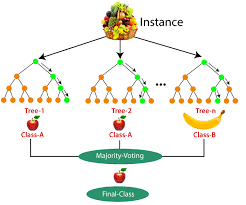

In [ ]:
# MODELLING

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# write code to print confusion matrix
## start code 


##end Code


# write code to print classification report
## start code



## end code

**Evaluating Model**

You can evaluate your model using eli5 library and can see the weights or contribution of different features in your model.
Below is provided its implementation.

In [ ]:
# finding the Permutation importance

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

**Partial Dependency Plots**

You can also plot some partial dependency plots for some fetures to understand your model better.(its optional)

In [ ]:
# plotting the partial dependence plot for adminisrative duration

# importing pdp
from pdpbox import pdp, info_plots

## start code




## end code

In [ ]:
# plotting partial dependency plot for Informational Duration
## start code




## end code

**Shap Values**

In [ ]:
# let's take a look at the shap values

# importing shap


explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values[1], x_test, plot_type = 'bar')

In [ ]:
shap.summary_plot(shap_values[1], x_test)

**Hyperparameter Tuning**

You may use Random Search for this and try different sets of parameters like n_estimators , max_depth, min_samples_leaf etc and choose the best set of parameters.

In [ ]:
#write your code here


## Conclusion

In [ ]:
# Write down your interpretations about your model and insights here.